## 1d

In [153]:
import numpy as np

#define variables
L=100
time_f=100
T=10 #KbT
J=1
step=5
realiz=800 #mc means

#define the vector of spins

def rnd1():
    r=np.random.randint(0,2)
    if r==0: return -1
    if r==1: return 1

s=[rnd1() for i in range(L)]


In [146]:
#define pbc
pbc=np.zeros(L+2)
pbc[0]=L-1
pbc[L+1]=0
for i in range(1,L+1):
    pbc[i]=i-1
print(pbc)

[99.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.
 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.
 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52.
 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70.
 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88.
 89. 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.  0.]


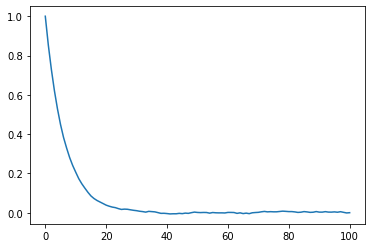

In [147]:
#montecarlo evolution    
mag=np.zeros(time_f+1)
for r in range(0,realiz):
    s=[1 for i in range(L)]
    for t in range(0,time_f):
        m=sum(s)/L 
        mag[t]=mag[t]+m/realiz
        for count in range(0,int(L/step)): #montecarlo attempt
            a=np.random.randint(0,L)
            x=np.random.random()
            delta_E=2*s[int(pbc[a+1])]*(s[int(pbc[a-1+1])]+s[int(pbc[a+1+1])])  #only 1d, consider only nearest neighbours
            if x<0.5*(1-np.tanh(delta_E/(2*T))): s[int(pbc[a+1])]=-s[int(pbc[a+1])]
    
t=np.linspace(0,time_f,time_f+1)
import matplotlib.pyplot as plt
plt.plot(t,mag)

## 2d

In [210]:
#define variables
L=15   #dimension of the squared matrix
time_f=20
T=2 #KbT
J=1
step=1
realiz=50 #mc means

In [200]:
def rnd1():
    r=np.random.randint(0,2)
    if r==0: return -1
    if r==1: return 1

#s=[[rnd1() for i in range(L)] for j in range(L)]

def init(s,L):
    for i in range(L):
        for j in range(L):
            s[i,j]=rnd1()
    return s

#s=np.zeros((L,L))
    #init(s,L)
#s=np.ones((L,L))

In [198]:
#define pbc
def bc(i):
    if i>L-1: 
        return 0
    if i<0:
        return L-1
    else:
        return i
    
#define delta E between 2 spin configurations
def delta(s,a,b):
    return 2*s[a][b]*(s[a][int(bc(b+1))]+s[a][int(bc(b-1))]+s[int(bc(a+1))][b]+s[int(bc(a-1))][b])   #consider only nearest neighbours

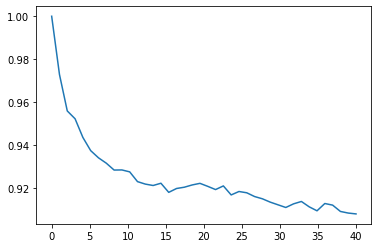

In [199]:
#montecarlo evolution  vs time (dynamics) 
mag=np.zeros(time_f)
for r in range(0,realiz):
    s=np.ones((L,L))  #ground state
    for t in range(0,time_f):
        m=sum(sum(s))/(L*L) 
        mag[t]=mag[t]+m/realiz
        for count in range(0,int(L*L/step)): #montecarlo attempt
            a=np.random.randint(0,L)
            b=np.random.randint(0,L)
            x=np.random.random()
            delta_E=delta(s,a,b)  
            if x<0.5*(1-np.tanh(delta_E/(2*T))): s[int(pbc(a)),int(pbc(b))]=-s[int(pbc(a)),int(pbc(b))]
    
import matplotlib.pyplot as plt
time=np.linspace(0,mag.shape[0],mag.shape[0])
plt.plot(time,mag)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


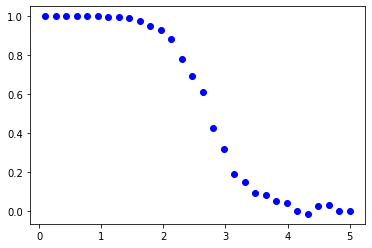

In [215]:
#montecarlo evolution vs temperature
M=[]
temperatures = np.linspace(0.1,5,30)

for i in range(len(temperatures)):
    T=temperatures[i]
    mag=np.zeros(time_f)
    for r in range(0,realiz):
        s=np.ones((L,L))  #ground state
        for t in range(0,time_f):
            m=sum(sum(s))/(L*L) 
            mag[t]=mag[t]+m/realiz
            for count in range(0,int(L*L/step)): #montecarlo attempt
                a=np.random.randint(0,L)
                b=np.random.randint(0,L)
                x=np.random.random()
                delta_E=delta(s,a,b)  
                if x<0.5*(1-np.tanh(delta_E/(2*T))): s[int(pbc(a)),int(pbc(b))]=-s[int(pbc(a)),int(pbc(b))]
    M.append(mag[time_f-1])
    print(i)

import matplotlib.pyplot as plt
plt.plot(temperatures,M,'bo')